<h1> Pruebas para Liga de Bolsa </h1>

<h2> Descargar información de las cotizaciones </h2>

Se guardarán la información de la cotización en un dataframe de pequeñas dimensiones y con la mínima información posible para ahorrar memoria.

### Próximos pasos

- Mostrar como funciona el análisis bursátil a nivel de código.

- Probar a ejecutar el Jupyter Notebook en una máquina virtual de Google Cloud

> Buscar algún tutorial para ello e intentar averiguar la manera de seleccionar la VM más adecuada.

- Probar la API de Interactive Brokers (trading intradía)

> Comprobar compatibilidad con Google Cloud

> Buscar alternativas si procede

- Desarrollar un algoritmo mediante indicadores técnicos.

> Comprobar significancia de los indicadores y otros valores (por ejemplo, la beta).

> Utilizar métodos de valididación cruzada.

> ¿Seleccionar acciones por las señales de compra y/o por sus valores de beta?

> Tanto en este paso como en los posteriores, será interesante realizar un análisis de de componentes principales para optimizar el código.

- Del algortimo anterior, integrar indicadores fundamentales

> Asegurarse de que estos indicadores fundamentales tengan valores concordes a su periodo.

> Comprobar si aportarán en el análisis.

- Teniendo en cuenta lo de antes, integrar el machine learning

> Tal vez un clasificador que determine, con esperanza estadística positiva, si la compra o venta serán rentables o no.

- Con todo lo de antes, desarrollar un algoritmo de IA que tenga en cuenta los máximos parámetros posibles.

---

In [2]:
# Install investpy package. This first command does not work.
# ! pip install git+https://github.com/alvarobartt/investpy.git@master
# This one works!
# ! pip install investpy

# Interactive Brokers API
# ! pip install ibapi

  Created wheel for ibapi: filename=ibapi-9.81.1.post1-py3-none-any.whl size=67958 sha256=4d9eff42bc8b1139910d10689a490d4507469c61aaf94e27bd161534dfe3c7f9
  Stored in directory: c:\users\amaia\appdata\local\pip\cache\wheels\30\1e\aa\88bbf9591de3fff181937cb97b8ebcc4a7642e02ce313becae
Successfully built ibapi


In [2]:
import investpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

### Investing API

In [3]:
# Load some historical data from the AAPL stock. Date format is: dd/mm/yyyy
    # Frequency: daily
    # Open, maximum, minimum and close prices, volume and currency.
aapl = investpy.get_stock_historical_data(stock='AAPL', country='United States', from_date='01/01/2020', to_date='30/10/2021')
aapl

# Get the five first values of volume from the df dataframe
# with these example options:
# 1. df.iloc[0:5]["Volume"] 
# 2. df.head()["Volume"]

# The same, but with the last five values:
# 1. df.iloc[-5:]["Volume"]
# 2. df.tail()["Volume"]

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-02,74.06,75.15,73.80,75.09,135647008,USD
2020-01-03,74.29,75.14,74.13,74.36,146536000,USD
2020-01-06,73.45,74.99,73.19,74.95,118579000,USD
2020-01-07,74.96,75.22,74.37,74.60,111511000,USD
2020-01-08,74.29,76.11,74.29,75.80,132364000,USD
...,...,...,...,...,...,...
2021-10-25,148.68,149.37,147.62,148.64,50380000,USD
2021-10-26,149.33,150.84,149.01,149.32,60632000,USD
2021-10-27,149.36,149.73,148.49,148.85,55788000,USD


In [4]:
# Load futher data from a stock

# Apple stock will be saved at search_result
aapl_info = investpy.search_quotes(text='apple', products=['stocks'], countries=['united states'], n_results=1)
# Save the information in a dict variable
aapl_info = aapl_info.retrieve_information()
print(aapl_info)

# Technical information:
    # prevClose, dailyRange, open (most recent), weekRange (most recent), volume(unkwown) avgVolume(it could be weekly)
# Fundamental information:
    # revenue, eps (earning per share), marketCap, dividend (last), ratio (P/E).
# Other or both
    # beta, oneYearReturn, sharesOutstanding, nextEarningDate

'''
# avgVolume: 74388303

for x in range(1, len(df["Volume"])):
    print(f"{x}: {df.tail(x)['Volume'].mean()}")
    # mean output 29 is similar

for x in range(1, len(df["Volume"])):
    print(f"{x}: {df.tail(x)['Volume'].median()}")
    # median output 30 is similar
'''


{'prevClose': 152.57, 'dailyRange': '146.41-149.94', 'revenue': 347160000000, 'open': 147.21, 'weekRange': '107.32-157.26', 'eps': 5.61, 'volume': 120511817, 'marketCap': 2460000000000, 'dividend': '0.88(0.58%)', 'avgVolume': 74388303, 'ratio': 26.72, 'beta': 1.21, 'oneYearReturn': '37.62%', 'sharesOutstanding': 16406397000, 'nextEarningDate': '01/02/2022'}


'\n# avgVolume: 74388303\n\nfor x in range(1, len(df["Volume"])):\n    print(f"{x}: {df.tail(x)[\'Volume\'].mean()}")\n    # mean output 29 is similar\n\nfor x in range(1, len(df["Volume"])):\n    print(f"{x}: {df.tail(x)[\'Volume\'].median()}")\n    # median output 30 is similar\n'

In [5]:
# import investpy

# s_results = investpy.search_quotes(text='a', products=['stocks'], countries=['united states'], n_results=10)

# s_results = map(lambda x: print(x), s_results)

### Interactive Brokers API

It will allow us to work with intraday data.
- IB Gateway is mandatory.

In [ ]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from datetime import datetime, timedelta
import pandas as pd

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self,self)
        cols = ['date', 'open', 'high', 'low', 'close']
        self.df = pd.DataFrame(columns=cols)
    
    def historicalData(self, reqId, bar):
        print(" Date:", bar.date, "Open:", bar.open, "High:", bar.high, "Low:", bar.low, "Close:", bar.close) #, "Volume: ", bar.volume, "Count: ", bar.barCount)
        dftemp = pd.DataFrame({'date':bar.date,'open':bar.open,'high':bar.high,'low':bar.low, 'close':bar.close}, index=[0])
        self.df = pd.concat([self.df, dftemp], axis=0)
        
    def historicalDataEnd(self, reqId: int, start: str, end: str):
        super().historicalDataEnd(reqId, start, end)
        print("HistoricalDataEnd. ReqId:", reqId, "from", start, "to", end)
        self.df.to_csv("GBP_USD_1Y_15mins.csv",index=False)
        self.disconnect()

app = IBapi()
app.connect('127.0.0.1', 4002, 0)

#Create contract object
def defineContract(symbol,secType,exchange,currency='USD'):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.currency = currency
    return contract

contract = defineContract(symbol='GBP',secType='CASH',exchange='IDEALPRO')
queryTime = (datetime.today() - timedelta(days=30)).strftime("%Y%m%d %H:%M:%S")
#queryTime = ""
duration = '1 Y'
barsize = '15 mins'
priceType = 'MIDPOINT'

app.reqHistoricalData(1, contract, queryTime, duration, barsize, priceType, 1, 1, False, [])
app.run()

## Technical analysis
Futher information [here](https://medium.com/codex/this-python-library-will-help-you-get-stock-technical-indicators-in-one-line-of-code-c11ed2c8e45f) (stockstats) and [here](https://towardsdatascience.com/technical-analysis-library-to-financial-datasets-with-pandas-python-4b2b390d3543) (ta).

In [6]:
# ! pip3 install stockstats
# ! pip3 install ta

In [7]:
# Technical analysis libraries
from stockstats import StockDataFrame
import ta


### stockstats library

In [8]:
# Datafrate to Stockstats dataframe library
aapl = StockDataFrame(aapl)
aapl.columns = aapl.columns.str.lower()
aapl

,open,high,low,close,volume,currency
Date,,,,,,
2020-01-02,74.06,75.15,73.80,75.09,135647008,USD
2020-01-03,74.29,75.14,74.13,74.36,146536000,USD
2020-01-06,73.45,74.99,73.19,74.95,118579000,USD
2020-01-07,74.96,75.22,74.37,74.60,111511000,USD
2020-01-08,74.29,76.11,74.29,75.80,132364000,USD
...,...,...,...,...,...,...
2021-10-25,148.68,149.37,147.62,148.64,50380000,USD
2021-10-26,149.33,150.84,149.01,149.32,60632000,USD
2021-10-27,149.36,149.73,148.49,148.85,55788000,USD


In [9]:
# Mostrar tres medias móviles (de 10, 20 y 50 periodos), RSI (14 periodos) and MACD
aapl[['close_10_sma', 'close_20_sma', 'close_50_sma', 'rsi_14', 'macd', 'macds']]


,close_10_sma,close_20_sma,close_50_sma,rsi_14,macd,macds
Date,,,,,,
2020-01-02,75.090,75.0900,75.0900,NaN,0.000000,0.000000
2020-01-03,74.725,74.7250,74.7250,0.000000,-0.016378,-0.009099
2020-01-06,74.800,74.8000,74.8000,46.535211,-0.002573,-0.006425
2020-01-07,74.750,74.7500,74.7500,35.871054,-0.008868,-0.007252
2020-01-08,74.960,74.9600,74.9600,65.263246,0.035649,0.005510
...,...,...,...,...,...,...
2021-10-25,146.240,144.1270,147.2414,58.680918,0.721314,-0.210838
2021-10-26,147.021,144.4975,147.2054,60.388237,0.882859,0.007902
2021-10-27,147.815,144.7985,147.1786,58.586324,0.961871,0.198696


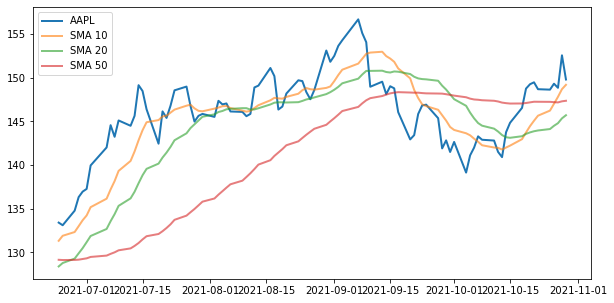

In [10]:
# Plot size in inches
plt.rcParams['figure.figsize'] = [10, 5]

# Plot the last 90 periods
plt.plot(aapl.iloc[-90:]['close'], linewidth = 2, label = 'AAPL')
plt.plot(aapl.iloc[-90:]['close_10_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 10')
plt.plot(aapl.iloc[-90:]['close_20_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 20')
plt.plot(aapl.iloc[-90:]['close_50_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 50')
plt.legend(loc = 'upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


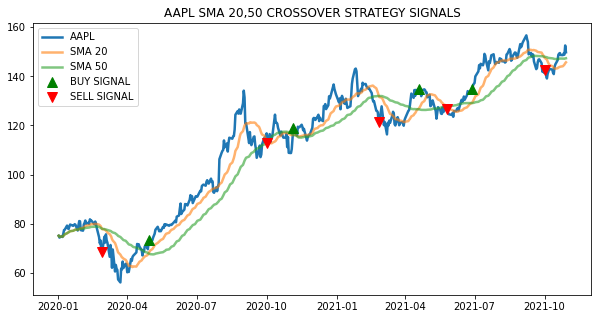

In [11]:
aapl['close_50_sma_xd_close_20_sma']

# Detect where the signals cross each other.
# Create buy and sell signals by close price, SMA_50 and SMA_20.
# This could be interesting for testing methods 
buy_signals = aapl['close_50_sma_xd_close_20_sma']
sell_signals = aapl['close_20_sma_xd_close_50_sma']

for i in range(len(buy_signals)):
    if buy_signals.iloc[i] == True:
        buy_signals.iloc[i] = aapl.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):    
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = aapl.close[i]
    else:
        sell_signals.iloc[i] = np.nan


plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(aapl['close'], linewidth = 2.5, label = 'AAPL')
plt.plot(aapl['close_20_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 20')
plt.plot(aapl['close_50_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 50')
plt.plot(aapl.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(aapl.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('AAPL SMA 20,50 CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


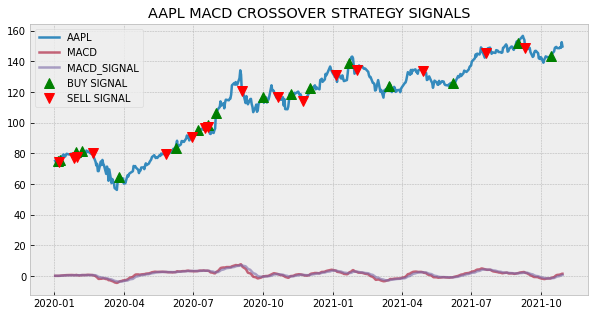

In [12]:
# FIXME: MACD must be plotted in differnt subplot.
# Also, it is necessary to check the different indicators, apart of MACD and MACDS.
# Maybe, it can be interesting look for some different styles.

buy_signals = aapl['macds_xd_macd']
sell_signals = aapl['macd_xd_macds']

for i in range(len(buy_signals)):
    if buy_signals.iloc[i] == True:
        buy_signals.iloc[i] = aapl.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):    
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = aapl.close[i]
    else:
        sell_signals.iloc[i] = np.nan


plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(aapl['close'], linewidth = 2.5, label = 'AAPL')
plt.plot(aapl['macd'], linewidth = 2.5, alpha = 0.6, label = 'MACD')
plt.plot(aapl['macds'], linewidth = 2.5, alpha = 0.6, label = 'MACD_SIGNAL')
plt.plot(aapl.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(aapl.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')

plt.legend(loc = 'upper left')
plt.title('AAPL MACD CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')
plt.show()

### ta library